# 用 Pandas 作excel讀出，.csv寫入

In [2]:
import pandas as pd

In [3]:
import numpy as np

# 讀取excel file

In [3]:
table = pd.read_excel('1101.xlsx')

In [4]:
table.head()

,日期,開盤價,漲跌點數
0,20070102,28.04,0.00
1,20070103,28.14,-0.29
2,20070104,27.57,-0.09
3,20070105,27.76,-0.28
4,20070108,26.96,-0.05


# 寫入.csv檔

In [5]:
table.to_csv('out.csv', sep=',')

# 寫入.xlsx檔

In [6]:
writer=pd.ExcelWriter('out.xlsx')
table.to_excel(writer,'sheet1',index=False)
writer.save()

# 利用Pandas抓取網站資料

In [22]:
import html5lib
url = 'http://www.stockq.org/market/asia.php'
table = pd.read_html(url)[4]
table = table.drop(table.columns[[0,1,2,3,4]],axis=0)
table = table.drop(table.columns[9:296],axis=1)
table

,0,1,2,3,4,5,6,7,8
5,紐西蘭,7611.444,-74.00,-0.96%,7685.450,7611.440,7685.450,10.61%,18:49
6,澳洲股市,5764.00,-91.90,-1.57%,5855.90,5760.10,0.79%,16:37,NaN
7,日經225,20033.43,-186.87,-0.92%,20044.01,19946.51,20025.63,4.81%,15:15
8,東證一部,1611.9,-12.17,-0.75%,1612.51,1604.82,1611.08,6.14%,15:00
9,東證二部,6141.51,-9.61,-0.16%,6141.79,6105.96,6108.14,17.43%,15:00
10,JASDAQ,145.12,0.14,0.10%,145.13,143.82,144.17,18.26%,15:00
11,韓國股市,2391.79,-3.87,-0.16%,2391.81,2381.40,2382.15,18.03%,18:03
12,台灣加權,10395.07,-26.58,-0.26%,10395.07,10329.84,10367.26,12.34%,13:47
13,台灣店頭,135.7,0.01,0.01%,135.70,134.66,135.69,8.40%,13:49
14,上海綜合,3192.427,4.36,0.14%,3193.241,3171.570,3176.948,2.86%,15:29


In [31]:
import html5lib
url = 'https://www.google.com/finance/historical?q=TPE%3A2330&ei=jmVWWZChD4eI0ATIm7LACQ'
table = pd.read_html(url)[2]
table=table.drop(table.columns[[0]],axis=0)
table.columns=['dates','open','high','low','close','volume']
table[['open','high','low','close','volume']]=\
table[['open','high','low','close','volume']].astype(float)
for i in range(1,len(table)+1):
        table['dates'].loc[i]=\
        datetime.datetime.strptime(table['dates'].loc[i], "%b %d, %Y").date()
table['dates']=dt.date2num(table['dates'])
table=zip(table.dates,table.open,table.high,table.low,table.close,table.volume)
#table.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
table.dtypes

AttributeError: 'zip' object has no attribute 'dtypes'

# 繪製股票圖 匯入套件

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
import datetime
import matplotlib.dates as dt

# 繪製股票圖 

In [9]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

In [10]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

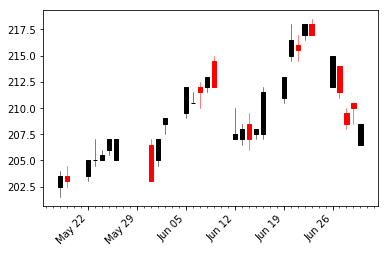

In [33]:
candlestick_ohlc(ax, table, width=0.6)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# 使用自定套件

In [15]:
import ProgramTrade.class_GetGoogleFinance as Gf
import datetime
stkno='2330'
start=datetime.datetime(2017,5,1)
end=datetime.datetime(2017,7,1)
gf=Gf.GetGoogleFinance(stkno,start,end)
gf.getid()
Data=gf.getstock(True)
Data.head()

list index out of range


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\ipython\ProgramTrade\class_GetGoogleFinance.py:73: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  Data=Data.sort_index(by=['dates'],ascending=[True])


,dates,open,high,low,close,volume
40,2017-05-02,198.5,199.0,195.5,196.5,44102000.0
39,2017-05-03,198.0,198.5,197.0,198.0,25702000.0
38,2017-05-04,198.5,199.0,197.0,198.0,22076000.0
37,2017-05-05,197.0,198.5,197.0,197.5,17022000.0
36,2017-05-08,199.0,202.5,199.0,202.5,36514000.0


# 繪製OHLC股票圖

In [16]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from matplotlib.finance import candlestick_ohlc
import datetime
import matplotlib.dates as dt
mondays = MonthLocator(bymonthday=1)
MonthFormatter = DateFormatter('%b %d %Y')

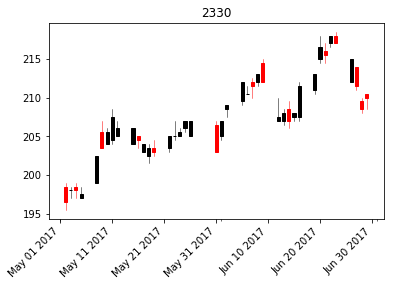

In [17]:
Data['dates']=dt.date2num(Data['dates'])
quotes=zip(Data.dates,Data.open,Data.high,Data.low,Data.close,Data.volume)    
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_minor_locator(mondays)
ax.xaxis.set_major_formatter(MonthFormatter)
candlestick_ohlc(ax, quotes, width=0.6)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title(stkno)
plt.show()

In [5]:
Open=table['開盤價']

In [6]:
Updown=table['漲跌點數']

In [7]:
Open.head()

0    28.04
1    28.14
2    27.57
3    27.76
4    26.96
Name: 開盤價, dtype: float64

In [ ]:
計算資料範圍

In [8]:
(r,c)=table.shape

In [9]:
(r,c)

(325, 3)

In [ ]:
新增工作區陣列(r,5)

In [10]:
wk=np.zeros((r,5))

In [ ]:
定義工作参數 心理線指標值= 10, 上限值= 0.75, 下限值= 0.25

In [11]:
n=10; upb=0.75; lob=0.25

In [12]:
wk[n-2,2:5]=[2,0,1]

In [ ]:
計算Buy & Hold報酬

In [13]:
BH = (Open[r-1] - Open[n-1])*100 / Open[n-1]

In [19]:
print('BH報酬率 = {:5.2f} %'.format(BH))

BH報酬率 = 76.24 %


In [ ]:
判斷漲跌

In [14]:
for i in range(r):
    if Updown[i] > 0:
        wk[i,0] = 1
    else:
        wk[i,0] = 0

In [ ]:
計算心理線指標

In [28]:
for i in range(n-1,r):
    wk[i,1] = wk[i-n+1: i+1,0].mean()

In [ ]:
判斷買賣點

In [29]:
for i in range(n-1,r):
    if wk[i,1] <= lob:
        wk[i,2] = 1
    elif wk[i,1] >= upb:
        wk[i,2] = 3
    else:
        wk[i,2] = 2

In [ ]:
計算庫存股數

In [35]:
for i in range(n-1,r):
    if wk[i-1,2] == 1:
        wk[i,3] = wk[i-1,4] / Open[i] + wk[i-1,3]
    elif wk[i-1,2] == 2:
        wk[i,3] = wk[i-1,3]
    else:
        wk[i,3] = 0

In [36]:
wk

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       ..., 
       [ 1.        ,  0.3       ,  2.        ,  0.02316581,  0.        ],
       [ 0.        ,  0.2       ,  1.        ,  0.02316581,  0.        ],
       [ 0.        ,  0.2       ,  1.        ,  0.02316581,  0.        ]])

In [ ]:
計算現金餘額

In [37]:
for i in range(n-1,r):
    if wk[i-1,2] == 1:
        wk[i,4] = 0
    elif wk[i-1,2] == 2:
        wk[i,4] = wk[i-1,4]
    else:
        wk[i,4] = wk[i-1,3] * Open[i] + wk[i-1,4]

In [38]:
wk

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       ..., 
       [ 1.        ,  0.3       ,  2.        ,  0.02316581,  0.        ],
       [ 0.        ,  0.2       ,  1.        ,  0.02316581,  0.        ],
       [ 0.        ,  0.2       ,  1.        ,  0.02316581,  0.        ]])

In [ ]:
計算報酬率

In [39]:
Rt = (Open[r-1] * wk[r-1,3] + wk[r-1,4] - wk[n-2,4]) / wk[n-2,4]

In [40]:
print('報酬率 = {:5.2f} %'.format(Rt * 100))

報酬率 = 15.83 %


In [42]:
wk

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       ..., 
       [ 1.        ,  0.3       ,  2.        ,  0.02316581,  0.        ],
       [ 0.        ,  0.2       ,  1.        ,  0.02316581,  0.        ],
       [ 0.        ,  0.2       ,  1.        ,  0.02316581,  0.        ]])